In [1]:
import pickle
ls_frames_top = pickle.load(open('data/ls_frames_top_4_of_256', 'rb'))
len(ls_frames_top), len(ls_frames_top)

(2628, 2628)

In [2]:
ls_frames_top[0].keys()

dict_keys([&#39;EncodingsUniqueCount&#39;, &#39;FramesCount&#39;, &#39;Encodings&#39;, &#39;Actions&#39;, &#39;FrameLast&#39;])

In [3]:
ls_frames_top[0]['Encodings'].shape

torch.Size([1600, 1, 9, 15])

In [4]:
encodings = ls_frames_top[0]['Encodings'].reshape(-1, 9*15)

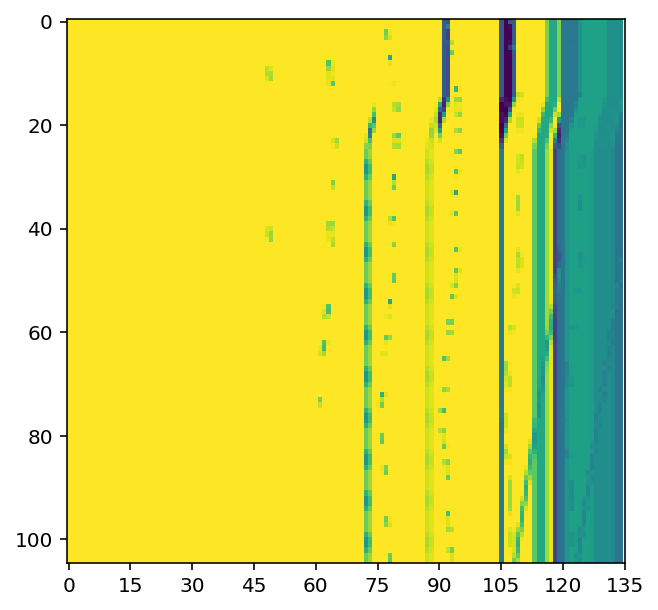

In [77]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(encodings[:105], aspect='auto')
ax.set_xticks(ticks=range(0, 9*15+1, 15));

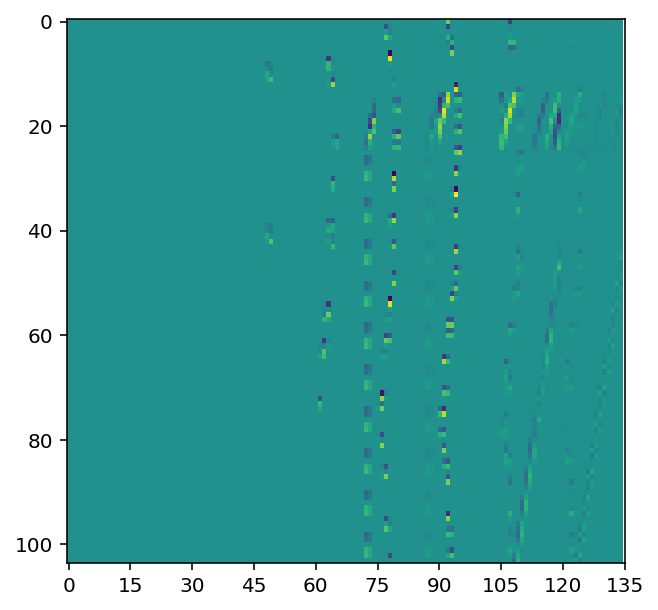

In [130]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(np.diff(encodings[:105], axis=0), aspect='auto')
ax.set_xticks(ticks=range(0, 9*15+1, 15));

In [68]:
encodings_all = np.concatenate([result['Encodings'].reshape(-1, 9*15) for result in ls_frames_top])
encodings_all.shape

(4198866, 135)

In [69]:
import sklearn.decomposition

pca = sklearn.decomposition.PCA(n_components=2)
pca.fit(encodings_all)

PCA(copy=True, iterated_power=&#39;auto&#39;, n_components=2, random_state=None,
    svd_solver=&#39;auto&#39;, tol=0.0, whiten=False)

In [75]:
all_X, all_Y = pca.transform(encodings_all).T
(np.min(all_X), np.max(all_X)), (np.min(all_Y), np.max(all_Y))

((-0.76876307, 0.8960005), (-0.7623395, 1.0323112))

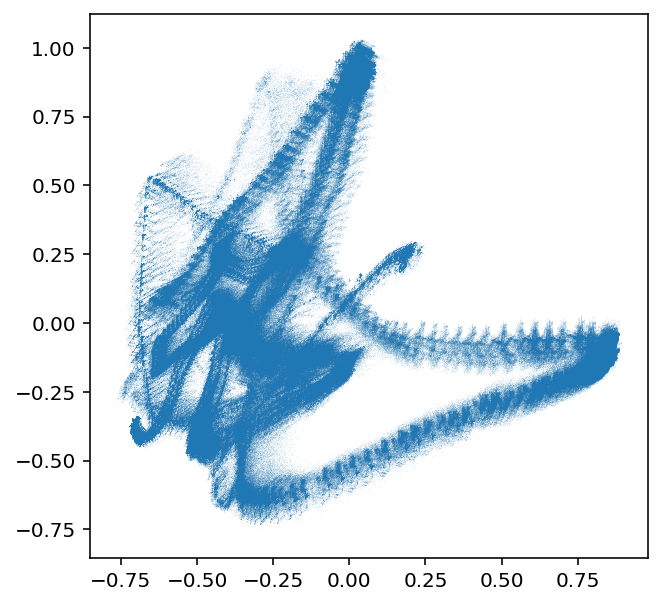

In [92]:
fig, ax = plt.subplots(figsize=(5, 5))

all_X, all_Y = pca.transform(encodings_all).T
ax.scatter(all_X, all_Y, lw=0, alpha=0.1, s=0.1);

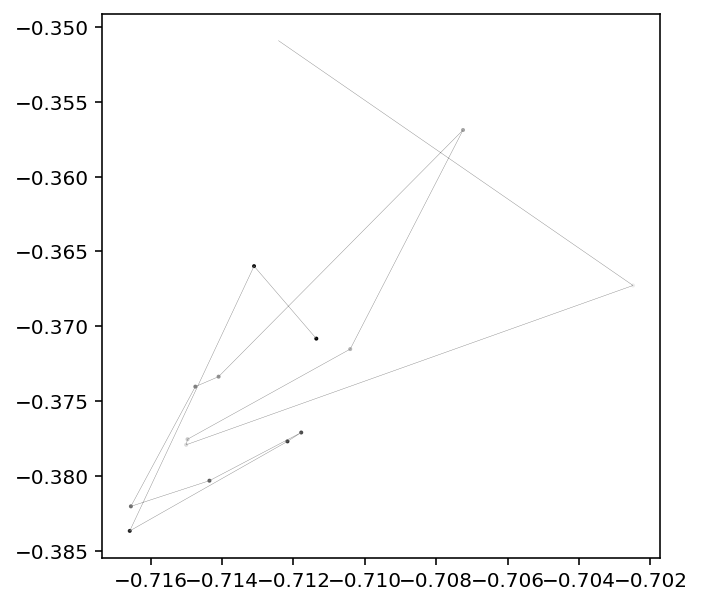

In [127]:
fig, ax = plt.subplots(figsize=(5, 5))

encodings_1 = ls_frames_top[0]['Encodings'].reshape(-1, 9*15)
all_X, all_Y = pca.transform(encodings_1[:15]).T
ax.plot(all_X, all_Y, lw=0.2, color='gray')
ax.scatter(all_X, all_Y, lw=0, c=np.linspace(1, 0, num=len(all_X)), cmap='gray', alpha=1, s=4);

In [129]:
import pickle
pickle.dump(pca, open('../interface/models/pca_top_4_of_256.sklearn.decomposition.PCA', 'wb'))